In [1]:
# Load in libraries

import numpy as np
import pandas as pd
import os
import glob
import re
import matplotlib.pyplot as plt
import seaborn as sns
import re

from pathlib import Path

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Load in Participant Info

In [2]:
file_name = "Participant Info.csv"

fpath = Path(file_name).absolute()

RAW_DIR = os.path.join(fpath.parent.parent, "data", "raw")

df_info = pd.read_csv(os.path.join(RAW_DIR, file_name))

## Load in subject dataframes and concatenate

In [3]:
# navigate to raw data folder
os.chdir(RAW_DIR)

file_list = glob.glob("*cort_scaling*")

# make empty dataframe
df_all = pd.DataFrame()
# loop over each subject file
for file in file_list:
    # reading csv for subj
    df = pd.read_csv(file)
    cols = df.columns
    col_to_rename = cols[df.columns.str.find("CoRT")==0][0]
    df = df.rename(columns={col_to_rename: 'CoRT'})
    df['subj_id'] = re.findall(r'(s\w.)_', file)[0]
    # concats each subj together
    df_all = pd.concat([df_all, df], sort=True)
    
# merge df info dataframe and subj data dataframes
df_merged = df_all.merge(df_info, on='subj_id')


In [4]:
def extract_string(x):
    if type(x)==str:
#         value = x.str.extract('(\d+)')
        value = re.findall(r'\d+', x) 
        value = float(value[0])
    elif type(x)==float:
        value = x
    elif type(x)==int:
        value = float(x)
        
    return value

In [5]:
# clean up

df_merged['CoRT'] = df_merged['CoRT'].apply(lambda x: extract_string(x))


## Visualization 

## Distribution of CoRT scores

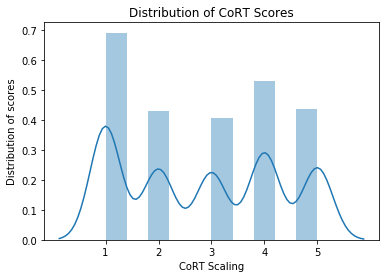

In [6]:
sns.distplot(df_merged['CoRT'], bins=10, kde=True)

# label
plt.xlabel('CoRT Scaling')
plt.ylabel('Distribution of scores')
plt.xticks(np.arange(1, 6, step=1.0))
plt.title('Distribution of CoRT Scores');


## Distribution of CoRT scores broken down by group (expert versus novice)

In [7]:

# sns.distplot(df_merged.query('group=="novice"')['CoRT'], bins=10, kde=True)

# sns.distplot(df_merged.query('group=="expert"')['CoRT'], bins=10, kde=True)

# # label (ADD LEGEND)
# plt.xlabel('CoRT Scaling')
# plt.ylabel('Distribution of scores')
# plt.xticks(np.arange(1, 6, step=1.0))
# plt.title('Distribution of CoRT Scores');


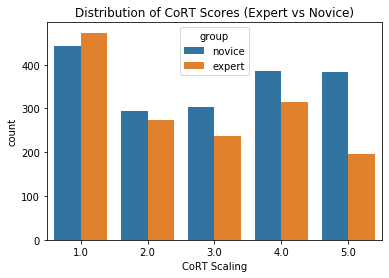

In [8]:
sns.countplot(x='CoRT', hue='group', data=df_merged)
plt.xlabel('CoRT Scaling')
plt.title('Distribution of CoRT Scores (Expert vs Novice)');

## Assess reliability between groups (expert versus novice)

## Grouping Sentences and Averaging CoRT Score